### Loading Data

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# load all csvs from ../log/parallel and ../log/sequential
parallel_times = []
best = ([],[],0) # assets sharpe
for i in range(1, 6):
    df = pd.read_csv(f'../log/parallel/parallel_{i}.csv')
    time = df['Execution Time (seconds)'].values[0]
    parallel_times.append(time)
    if df['Sharpe Ratio'].values[0] > best[2]:
        best = (df['Asset Name'].values,df['Weight'].values, df['Sharpe Ratio'].values[0])

sequential_times = []
for i in range(1, 6):
    df = pd.read_csv(f'../log/sequential/sequential_{i}.csv')

    time = df['Execution Time (seconds)'].values[0]
    sequential_times.append(time)
    if df['Sharpe Ratio'].values[0] > best[2]:
        best = (df['Asset Name'].values,df['Weight'].values, df['Sharpe Ratio'].values[0])


# average the times
parallel_avg = np.mean(parallel_times)
sequential_avg = np.mean(sequential_times)

# load python times
python_avg = pd.read_csv('../log/python_parallel/python_parallel.csv')['time_sec'].mean()

#data to minutes
parallel_avg = parallel_avg / 60
sequential_avg = sequential_avg / 60
python_avg = python_avg / 60

print(f"Best Sharpe Ratio: {best[2]}")
print(f"weights: {best[1]}")
print(f"Portfolio: {best[0]}")


Best Sharpe Ratio: 3.204293874250252
weights: [0.13597839 0.00943224 0.01327864 0.13717761 0.00879847 0.02546097
 0.04186083 0.01714479 0.03475067 0.0111338  0.06707352 0.02584144
 0.00810561 0.075908   0.00863295 0.04603519 0.0086242  0.00380714
 0.05628434 0.0408133  0.01803705 0.05414319 0.01849071 0.00220135
 0.13098558]
Portfolio: ['WMT' 'WBA' 'VZ' 'V' 'UNH' 'TRV' 'PG' 'NKE' 'MSFT' 'MMM' 'MCD' 'JPM'
 'JNJ' 'IBM' 'HON' 'HD' 'GS' 'DOW' 'DIS' 'CVX' 'CSCO' 'CRM' 'BA' 'AMGN'
 'AAPL']


### Plotting Data

/tmp/ipykernel_132723/3094774167.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Version', y='Execution Time (minutes)', data=df, palette='Blues_d')


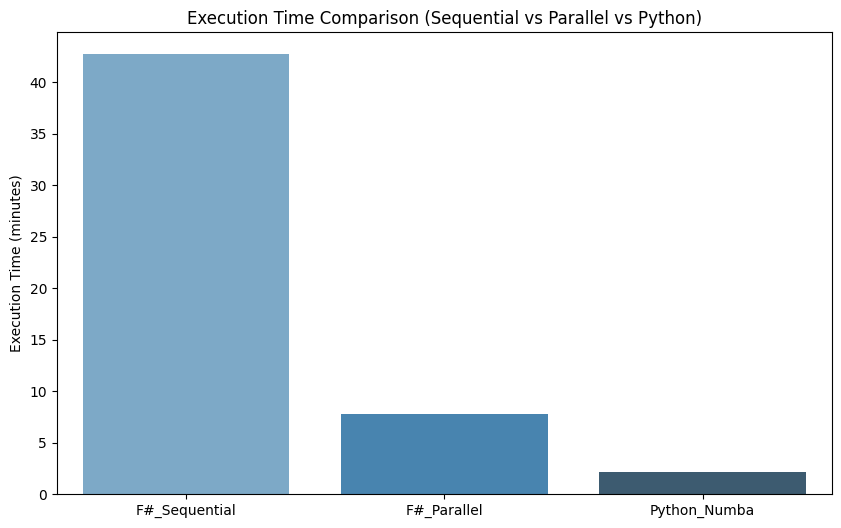

In [19]:
speedup_parallel = sequential_avg / parallel_avg
speedup_python = python_avg / parallel_avg

# Data for plotting
data = {
    'Version': ['F#_Sequential', 'F#_Parallel', 'Python_Numba'],
    'Execution Time (minutes)': [sequential_avg, parallel_avg, python_avg],
    'Speedup': [1, speedup_parallel, speedup_python]
}

df = pd.DataFrame(data)

# Plotting Execution Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Version', y='Execution Time (minutes)', data=df, palette='Blues_d')
plt.title('Execution Time Comparison (Sequential vs Parallel vs Python)')
plt.ylabel('Execution Time (minutes)')
plt.xlabel('')
plt.show()



| Version         | Average Time (minutes) | Speedup vs Previous |
|----------------|------------------------|----------------------|
| F# Sequential   | 42.73                 | -                    |
| F# Parallel     | 7.80                  | 5.48×                |
| Python Numba    | 2.19                  | 3.56×                |


In [20]:
print(f"F# Sequential Average Time: {sequential_avg:.2f} minutes")
print(f"F# Parallel Average Time: {parallel_avg:.2f} minutes")
print(f"Python Numba Average Time: {python_avg:.2f} minutes")

F# Sequential Average Time: 42.73 minutes
F# Parallel Average Time: 7.80 minutes
Python Numba Average Time: 2.19 minutes


### Simulate for 2025 T1


In [ ]:
import pandas as pd
import numpy as np

t1 = pd.read_csv('../data/dow_returns_2025_t1.csv')

tickers, weights, _ = best

returns = t1[list(tickers)]

weights = np.array(weights)
weights = weights / weights.sum()  

portfolio_returns = (returns * weights).sum(axis=1)

mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()
sharpe_ratio = mean_return / std_return

print(f"Sharpe Ratio: {sharpe_ratio:.6f}")


Sharpe Ratio: -0.002745


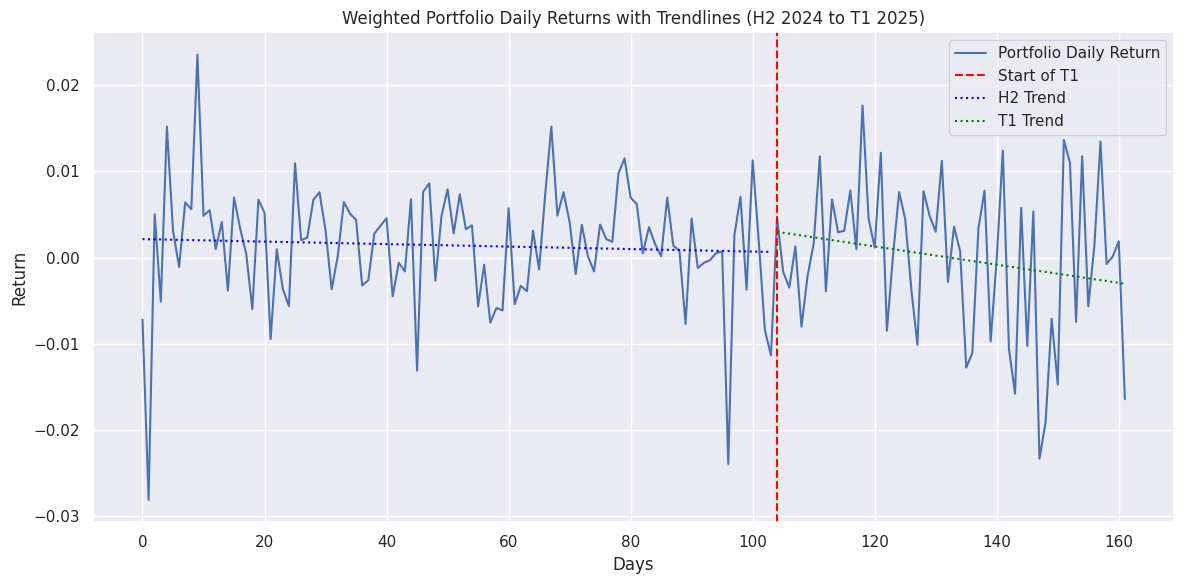

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

h2 = pd.read_csv('../data/dow_returns_2024_h2.csv')
t1 = pd.read_csv('../data/dow_returns_2025_t1.csv')
combined = pd.concat([h2, t1], ignore_index=True)
assets, weights = best[0], best[1]
weights_df = pd.Series(weights, index=assets)
portfolio_data = combined[assets]
daily_returns = portfolio_data.dot(weights_df)
h2_end_index = len(h2)

plt.figure(figsize=(12, 6))
plt.plot(daily_returns, label='Portfolio Daily Return')

plt.axvline(h2_end_index, color='red', linestyle='--', label='Start of T1')

# trendline for H2
x_h2 = np.arange(h2_end_index)
y_h2 = daily_returns[:h2_end_index]
coeffs_h2 = np.polyfit(x_h2, y_h2, 1)
trend_h2 = np.poly1d(coeffs_h2)(x_h2)
plt.plot(x_h2, trend_h2, color='blue', linestyle=':', label='H2 Trend')

# trendline for T1
x_t1 = np.arange(h2_end_index, len(daily_returns))
y_t1 = daily_returns[h2_end_index:]
coeffs_t1 = np.polyfit(x_t1, y_t1, 1)
trend_t1 = np.poly1d(coeffs_t1)(x_t1)
plt.plot(x_t1, trend_t1, color='green', linestyle=':', label='T1 Trend')

plt.title('Weighted Portfolio Daily Returns with Trendlines (H2 2024 to T1 2025)')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_132723/3023679558.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weights_df, x='Asset', y='Weight', palette='viridis')


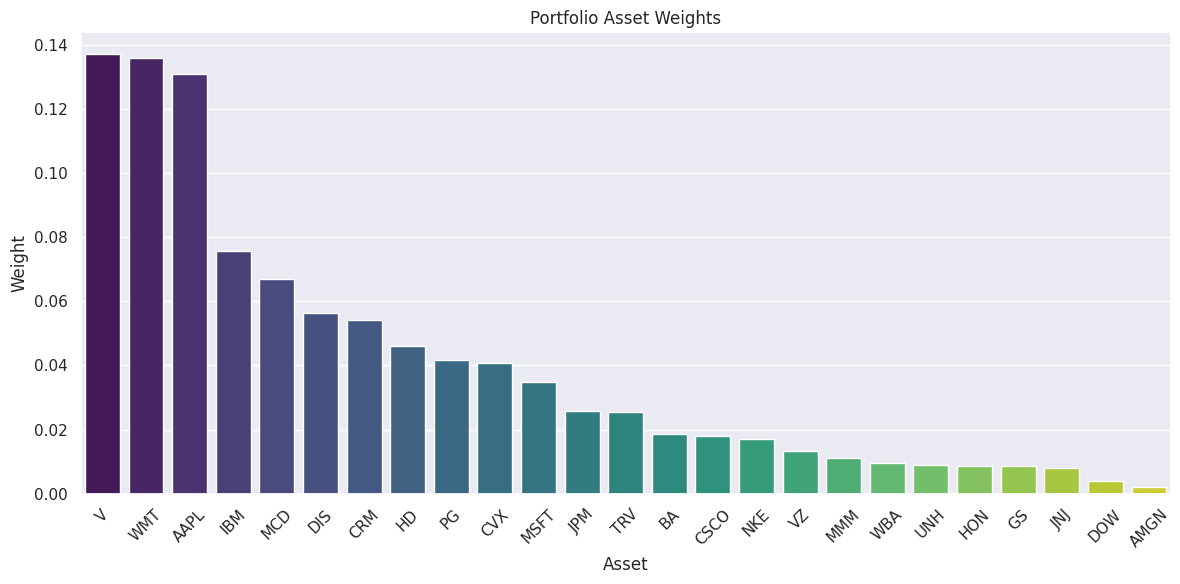

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

weights_df = pd.DataFrame({
    'Asset': best[0],
    'Weight': best[1]
}).sort_values(by='Weight', ascending=False)

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=weights_df, x='Asset', y='Weight', palette='viridis')

plt.title('Portfolio Asset Weights')
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
